# Task 1: Exploratory Data Analysis (EDA)

Import the necessary libraries:

In [1]:
# data processing
import numpy as np
import pandas as pd

# plotting
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# get data
from __future__ import print_function
import sqlite3

# import mann-whitney u test
from scipy.stats import mannwhitneyu

# check for Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor

# improvement #1
# placed all custom functions into a single package
from src.utils import *

First, establish a connection with the given `survive.db` stored in the `data` folder using sqlite3. <br>
Then export the resultant query into a pandas DataFrame:

In [2]:
# refer to config.yaml in the src folder for details
CONFIG_PATH = "src"
config = load_config("config.yaml", CONFIG_PATH)
# retrieve data from database
df = get_data("data/survive.db")

df

data is successfully saved!


,ID,Survive,Gender,Smoke,Diabetes,Age,Ejection Fraction,Sodium,Creatinine,Platelets,Creatine phosphokinase,Blood Pressure,Hemoglobin,Height,Weight,Favorite color
0,TIG1GE,0,Male,Yes,Normal,50,Low,141,0.7,266000.0,185,105,12.3,180,93,green
1,VXUCV9,1,Male,No,Normal,75,Low,134,2.5,224000.0,99,162,13.0,140,47,black
2,AFH4F1,1,Female,No,Pre-diabetes,80,Low,135,1.3,192000.0,776,179,12.4,150,61,white
3,ZK6PAC,0,Male,No,Normal,-60,Low,136,0.9,228000.0,2261,136,15.3,130,48,yellow
4,6CVBRT,0,Female,No,Normal,70,Low,141,0.9,358000.0,1202,171,13.3,177,64,blue
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,91MBFV,0,Male,Yes,Normal,50,Low,140,0.9,362000.0,298,109,11.8,178,51,blue
14996,3BK9WM,1,Male,Yes,Normal,62,Low,140,0.9,253000.0,231,141,14.6,171,114,green
14997,01ZP6F,0,Female,No,Normal,61,Low,141,0.9,229000.0,84,173,9.2,156,71,blue
14998,JMSGEG,0,Male,No,Normal,77,Low,137,1.1,406000.0,109,154,11.3,130,32,red


In [3]:
# original code
# conn = sqlite3.connect('data/survive.db')

# # create df
# df = pd.read_sql_query("SELECT * FROM survive", conn)
# df

In [4]:
# # close connection
# conn.commit()
# conn.close()

# Data Cleaning
Before processing the data, it is important to ensure that it is free of any missing and inconsistent values and outliers. <br>
With a clean dataset, we can tend try to establish relationships with the variables.

This dataset contains 15000 entries (rows) and 16 attributes (columns). <br>
The dataset consists of medical records of coronary artery disease patients. <br>

## Remove Missing Data
First, do a check to see if there are any missing values in the dataset:

In [5]:
# get total number of missing values
df.isnull().sum()

ID                          0
Survive                     0
Gender                      0
Smoke                       0
Diabetes                    0
Age                         0
Ejection Fraction           0
Sodium                      0
Creatinine                499
Platelets                   0
Creatine phosphokinase      0
Blood Pressure              0
Hemoglobin                  0
Height                      0
Weight                      0
Favorite color              0
dtype: int64

It appears that only the column `Creatinine` has missing values. <br>
What is the proportion of this column is missing?

In [6]:
# get percentage of missing data in dataset
a = len(df)
round(499/a * 100, 2)

3.33

Since this column has 3.33% of its data missing, I can safely remove all rows with missing values without any significant loss in data.

It is possible to replace these missing values with the mean Creatinine level for these patients. However that would be introducing an assumption which may not be accurate and instead lead to a misleading result when processed by a model.

In [7]:
# remove rows with missing data
df.dropna(axis=0, inplace=True)
df

,ID,Survive,Gender,Smoke,Diabetes,Age,Ejection Fraction,Sodium,Creatinine,Platelets,Creatine phosphokinase,Blood Pressure,Hemoglobin,Height,Weight,Favorite color
0,TIG1GE,0,Male,Yes,Normal,50,Low,141,0.7,266000.0,185,105,12.3,180,93,green
1,VXUCV9,1,Male,No,Normal,75,Low,134,2.5,224000.0,99,162,13.0,140,47,black
2,AFH4F1,1,Female,No,Pre-diabetes,80,Low,135,1.3,192000.0,776,179,12.4,150,61,white
3,ZK6PAC,0,Male,No,Normal,-60,Low,136,0.9,228000.0,2261,136,15.3,130,48,yellow
4,6CVBRT,0,Female,No,Normal,70,Low,141,0.9,358000.0,1202,171,13.3,177,64,blue
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,91MBFV,0,Male,Yes,Normal,50,Low,140,0.9,362000.0,298,109,11.8,178,51,blue
14996,3BK9WM,1,Male,Yes,Normal,62,Low,140,0.9,253000.0,231,141,14.6,171,114,green
14997,01ZP6F,0,Female,No,Normal,61,Low,141,0.9,229000.0,84,173,9.2,156,71,blue
14998,JMSGEG,0,Male,No,Normal,77,Low,137,1.1,406000.0,109,154,11.3,130,32,red


What about the dtypes of each of the columns:

In [8]:
# check dtypes and any missing values in dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14501 entries, 0 to 14999
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID                      14501 non-null  object 
 1   Survive                 14501 non-null  object 
 2   Gender                  14501 non-null  object 
 3   Smoke                   14501 non-null  object 
 4   Diabetes                14501 non-null  object 
 5   Age                     14501 non-null  int64  
 6   Ejection Fraction       14501 non-null  object 
 7   Sodium                  14501 non-null  int64  
 8   Creatinine              14501 non-null  float64
 9   Platelets               14501 non-null  float64
 10  Creatine phosphokinase  14501 non-null  int64  
 11  Blood Pressure          14501 non-null  int64  
 12  Hemoglobin              14501 non-null  float64
 13  Height                  14501 non-null  int64  
 14  Weight                  14501 non-null

While I expect some columns to contain numerical values (such as `Ejection Fraction`), it looks like some of them are of the string type (`object`) instead. <br>

Let's have a closer look at the exact values of these columns:

In [9]:
# improvement #2
# replace for loop with a lambda function
print(df.apply(lambda col: col.unique()))

ID                        [TIG1GE, VXUCV9, AFH4F1, ZK6PAC, 6CVBRT, 5JAQ9...
Survive                                                     [0, 1, No, Yes]
Gender                                                       [Male, Female]
Smoke                                                    [Yes, No, NO, YES]
Diabetes                                   [Normal, Pre-diabetes, Diabetes]
Age                       [50, 75, 80, -60, 70, 55, 65, 60, -40, 53, 68,...
Ejection Fraction                                 [Low, Normal, High, L, N]
Sodium                    [141, 134, 135, 136, 138, 139, 140, 127, 145, ...
Creatinine                [0.7, 2.5, 1.3, 0.9, 1.1, 1.7, 0.75, 1.2, 0.8,...
Platelets                 [266000.0, 224000.0, 192000.0, 228000.0, 35800...
Creatine phosphokinase    [185, 99, 776, 2261, 1202, 2017, 326, 96, 166,...
Blood Pressure            [105, 162, 179, 136, 171, 88, 164, 82, 83, 59,...
Hemoglobin                [12.3, 13.0, 12.4, 15.3, 13.3, 16.5, 16.3, 14....
Height      

In [10]:
# original code
# get all columns' names and unique values
for col in df:
    print(col)
    print(df[col].unique())
    print('-'*10)

ID
['TIG1GE' 'VXUCV9' 'AFH4F1' ... '01ZP6F' 'JMSGEG' '16DJV7']
----------
Survive
['0' '1' 'No' 'Yes']
----------
Gender
['Male' 'Female']
----------
Smoke
['Yes' 'No' 'NO' 'YES']
----------
Diabetes
['Normal' 'Pre-diabetes' 'Diabetes']
----------
Age
[ 50  75  80 -60  70  55  65  60 -40  53  68  42  45  79  58 -85  49  94
  43  77  51  61  72  69  40  78  62  63  87  54  57  95  90  48 -45  56
 -58  85 -50  86 -65  73  67 -52  82  59  46  44  64  52 -69 -42  41  47
 -53  81 -44 -49 -63  66 -59 -41 -70 -48 -55 -51 -73 -75 -57 -64 -78 -54
 -90 -80 -86 -61 -46 -62 -68 -43 -72 -66 -81 -47 -95 -82 -67]
----------
Ejection Fraction
['Low' 'Normal' 'High' 'L' 'N']
----------
Sodium
[141 134 135 136 138 139 140 127 145 137 133 132 142 130 128 143 131 144
 116 121 129 125 124 126 148 113 146]
----------
Creatinine
[0.7  2.5  1.3  0.9  1.1  1.7  0.75 1.2  0.8  1.18 1.8  1.   2.3  1.4
 1.83 3.5  3.8  1.9  2.2  9.   2.   2.7  1.6  9.4  5.8  1.5  2.9  2.1
 0.6  6.1  4.4  4.   2.4  0.5  3.4  5.   3

## Remove Redundant Data
`ID` and `Favorite color` do not provide any useful information in predicting survival rate, hence I will remove them.

In [11]:
# # remove ID and Favorite color from df
# df.drop(['ID', 'Favorite color'], axis=1, inplace=True)

## Fix Structural Errors

In [12]:
df = clean_data(df, CONFIG_PATH)

In [13]:
# get names of every column
df.columns.values

array(['Survive', 'Gender', 'Smoke', 'Diabetes', 'Age',
       'Ejection_Fraction', 'Sodium', 'Creatinine', 'Platelets',
       'Blood_Pressure', 'Hemoglobin', 'Height', 'Weight'], dtype=object)

In [14]:
columns = ['Survive', 'Smoke']
dummy_columns = ['Diabetes']
df = encoding_cat_cols(df, columns, dummy_columns)

C:\Users\user\anaconda3\lib\site-packages\pandas\core\frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]
C:\Users\user\anaconda3\lib\site-packages\pandas\core\generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


### Rename Column Names
Remove any spaces, dashes and brackets inside column names to adhere to naming conventions (and to avoid future errors).

In [15]:
# df.columns = df.columns.str.replace(' ','_')

# # check
# df.columns.values

### Categorical Data
Most of the columns are categorical data (can take on one of a fixed set of possible values):
- Survive
- Gender
- Smoke
- Diabetes
- Ejection Fraction
- Sodium
- Creatinine
- Platelets
- Creatine phosphokinase
- Blood Pressure
- Hemoglobin

There are some inconsistencies in the naming of the labels. <br>
E.g. Binary columns should only contain "Yes" and "No". These inconsistencies can introduce some inaccuracy in the represention of the data. Hence I will go over each of these columns are re-group the values accordingly.

### Survive
Since the objective is to predict the survival of coronary artery disease patients, the target variable will be the column `Survive`. Therfore, `Survive` should be a binary variable that only contains 2 different values. It is usually an indicator variable with  `0` representing `No`, and `1` representing `Yes`.<br>

However, `Survive` is of the `object` dtype, which suggests that it contains strings instead of integers. Upon closer examination, it contains both categorical and numerical values. <br>
As stated in the problem statement page 6, the value `0` means `No` and the value `1` means `Yes`. <br>
Hence, to make the column consistent, I will convert all categorical values into their respective numerical values:

In [16]:
# # manually replace text
# df['Survive'].replace({"No": 0, "Yes": 1}, inplace=True)

# # convert column to integer dtype
# df = df.astype({'Survive': int})

# check
print(df['Survive'].value_counts())
print(df['Survive'].dtype)

0    9628
1    4815
Name: Survive, dtype: int64
int32


In [17]:
# check if imbalance
df['Survive'].value_counts(normalize=True) * 100

# proportions are different as rows with High Ejection_Fraction were removed in clean_data()

0    66.662051
1    33.337949
Name: Survive, dtype: float64

About 68% of the patients in the dataset did not survive. <br>
This is likely because patients with health issues are likely to show a higher death rate.


Since the number of class labels (Yes and No) are not close to each other, processing them may cause the Machine Learning or Deep Learning models to predict more false negatives due to a biased or skewed dataset.

### Gender
The values consist of only `Male` and `Female`. Thus it is consistent.

### Smoke
This column has 2 versions of Yes and No: One that is fully capitalised and the other that's not. Since they share the same meaning, they can be grouped together:

In [18]:
# # replace values into binary yes/no values
# df['Smoke'].replace(to_replace="YES", value='Yes', inplace=True)
# df['Smoke'].replace(to_replace="NO", value='No', inplace=True)

# check values
df['Smoke'].unique()

array([1, 0])

### Diabetes
This column has 3 unique values: `Normal`, `Pre-diabetes` and `Diabetes`. Thus it is consistent.

### Ejection Fraction
Similarly as the `Smoke` column, `L` and `N` can be assumed to be a shorthand for `Low` and `Normal` respectively:

In [19]:
# # replace values into binary yes/no values
# df['Ejection_Fraction'].replace(to_replace="L", value='Low', inplace=True)
# df['Ejection_Fraction'].replace(to_replace="N", value='Normal', inplace=True)

# check values
df['Ejection_Fraction'].unique()

array([1, 0], dtype=int64)

### Sodium
According to [Wannamethee, Shaper, Lennon, Papacosta, and Whincup (2016)](https://doi.org/10.1016/j.numecd.2015.07.008), low serum sodium is associated with increased risk of CVD events. <br>
The normal range for blood sodium levels is 135 to 145 mg/dL per liter. <br>
Hence I **assume that low sodium levels is a factor of coronary artery disease.**
I will group the values into 2 different subsets: `low_sodium` and `normal_sodium`:

In [20]:
df['Sodium_bin'] = np.where(df['Sodium'] <135 , 'low_sodium', 'normal_sodium')

# check
df['Sodium_bin'].value_counts()

normal_sodium    10298
low_sodium        4145
Name: Sodium_bin, dtype: int64

### Creatinine
According to [Bagheri et al., 2019](https://doi.org/10.5455/medarh.2019.73.154-156), serum creatinine has significant association with CAD. <br>
A normal range is 0.7 to 1.3 mg/dL for males and 0.6 to 1.1 mg/dL for females. Women often have a lower creatinine level since they tend to have less muscle mass than men. <br>
Hence I **assume that high creatinine levels is a factor of coronary artery disease.** I will group the values into 2 different subsets: `high_creatinine` and `normal_creatinine`:

In [21]:
conditions = [(df['Gender'] == "Male") & (df['Creatinine'] > 1.3), (df['Gender'] == "Female") & (df['Creatinine'] > 1.1)]
choices = ["high_creatinine", 'high_creatinine']
    
df["Creatinine_bin"] = np.select(conditions, choices, default='normal_creatinine')

# check
df['Creatinine_bin'].value_counts()

normal_creatinine    14443
Name: Creatinine_bin, dtype: int64

### Platelets
According to [Uysal et al., 2016](https://doi.org/10.3904/kjim.2015.199), a high platelet count can help in predicting the severity of CAD before coronary interventions. <br>
A normal platelet count ranges from 150,000 to 450,000 platelets per microliter of blood. <br>
Hence I **assume that high platelets count is a factor of coronary artery disease.** I will group the values into 2 different subsets: `high_platelets` and `normal_platelets`:

In [22]:
df['Platelets_bin'] = np.where(df['Platelets'] >450000 , 'high_platelets', 'normal_platelets')

# check
df['Platelets_bin'].value_counts()

normal_platelets    13814
high_platelets        629
Name: Platelets_bin, dtype: int64

### Creatine phosphokinase
I am unsure of the threshold for a high level of creatine phosphokinase. <br>
But according to [Aujla and Patel (2021)](https://www.ncbi.nlm.nih.gov/books/NBK546624/), any level more than 200 IU/L is considered high and indicates a high risk of a heart attack. <br>
I will group the values into 2 different subsets: `high_creatine_phosphokinase` and `normal_creatine_phosphokinase`:

In [23]:
# df['Creatine_phosphokinase_bin'] = np.where(df['Creatine_phosphokinase'] >200 , 'high_creatine_phosphokinase', 'normal_creatine_phosphokinase')

# # check
# df['Creatine_phosphokinase_bin'].value_counts()

### Blood Pressure
According to [Verdecchia et al., 2010](https://doi.org/10.1007/s11886-010-0112-y), a reasonable target for the optimal Blood Pressure target for patients with CAD can to be in the range of 130-140/80-90 mm Hg. Thus any values above this value is dangerous. <br>
The first number (systolic blood pressure), measures the pressure in the arteries when the heart beats. <br>
The second number (diastolic blood pressure), measures the pressure in the arteries when your heart rests between beats. <br>
Hence I will **assume that the values given in the dataset are the systolic blood pressure values**. I will consider any value above 140 mm Hg as `high_bp`.

In [24]:
df['Blood_Pressure_bin'] = np.where(df['Blood_Pressure'] >140 , 'high_bp', 'normal_bp')

# check
df['Blood_Pressure_bin'].value_counts()

normal_bp    11092
high_bp       3351
Name: Blood_Pressure_bin, dtype: int64

### Hemoglobin
According to [Chonchol & Nielson, 2008](10.1016/j.ahj.2007.10.031), Hemoglobin levels >= 17 or < 15 g/dL are associated with increase risk for new cardiac events. <br>
Hence I **assume that any values outside this range is a factor of coronary artery disease.** I will group the values into 2 different subsets: `adnormal_hemoglobin` and `normal_hemoglobin`:

In [25]:
df['Hemoglobin_bin'] = np.where((df['Hemoglobin'] >= 17) | (df['Hemoglobin'] < 15) , 'adnormal_hemoglobin', 'normal_hemoglobin')

# check
df['Hemoglobin_bin'].value_counts()

adnormal_hemoglobin    11416
normal_hemoglobin       3027
Name: Hemoglobin_bin, dtype: int64

### Numerical Data
Only `Age` should remain as a numerical value instead of grouping the values into distinct age group. This is because an older patient will have a higher risk of death than a younger one. Hence it would be better to leave `Age` as a number.

However, some of these values are negative. I will **assume that the negative signs were added by mistake and simply remove them**.

In [26]:
df['Age'] = np.abs(df['Age'])

## Check for Outliers
I will use the Inter Quartile Range (IQR) method to seek out any possible outliers. <br>
Any value that lies beyond the range of -1.5 IQR to 1.5 IQR will be counted as an outlier.

IQR = Range between the 25th and 75th percentile

I will also do a check for the other variables that were originally have numerical values as well.

In [27]:
def iqr_outliers(df_col):
    out = []
    q1 = df_col.quantile(0.25)
    q3 = df_col.quantile(0.75)
    iqr = q3-q1
    
    Lower_tail = q1 - 1.5 * iqr
    Upper_tail = q3 + 1.5 * iqr
    
    for row in df_col:
        if row > Upper_tail or row < Lower_tail:
            out.append(row)
            
    print("Outliers for:", df_col.name)
    print(out)

In [28]:
%%timeit -n1 -r1

# improvement #3
# replace for loop with apply()

# apply iqr_outliers function on each column

# columns to check for outliers
num_list = ['Age', 'Sodium', 'Creatinine', 'Platelets', 'Blood_Pressure', 'Hemoglobin']

df[num_list].apply(iqr_outliers, axis=0)

Outliers for: Age
[]
Outliers for: Sodium
[116, 121, 116, 116, 116, 124, 121, 116, 116, 113, 116, 116, 121, 116, 121, 124, 121, 121, 113, 121, 113, 124, 124, 124, 113, 113, 124, 124, 124, 121, 124, 116, 121, 113, 121, 116, 124, 113, 113, 121, 124, 121, 113, 124, 121, 113, 121, 116, 121, 121, 116, 121, 121, 121, 124, 116, 121, 124, 113, 124, 121, 113, 124, 116, 113, 113, 113, 116, 116, 121, 121, 121, 124, 116, 116, 116, 121, 113, 116, 113, 116, 116, 121, 116, 116, 121, 113, 113, 113, 121, 121, 113, 124, 121, 124, 124, 124, 116, 121, 116, 121, 116, 121, 116, 116, 121, 124, 121, 113, 113, 121, 116, 116, 121, 113, 121, 121, 124, 116, 124, 124, 121, 124, 116, 113, 113, 121, 113, 113, 113, 116, 116, 124, 121, 113, 116, 124, 121, 124, 116, 116, 116, 113, 116, 113, 116, 116, 116, 113, 121, 124, 124, 116, 116, 121, 116, 121, 121, 121, 121, 113, 116, 124, 113, 116, 116, 121, 124, 113, 124, 124, 121, 121, 124, 113, 116, 121, 116, 113, 116, 121, 121]
Outliers for: Creatinine
[2.5, 2.5, 2.3, 2.5, 2

In [29]:
%%timeit -n1 -r1

# columns to check for outliers
num_list = ['Age', 'Sodium', 'Creatinine', 'Platelets', 'Blood_Pressure', 'Hemoglobin']

# original code
for col in num_list:
    iqr_outliers(df[col])

Outliers for: Age
[]
Outliers for: Sodium
[116, 121, 116, 116, 116, 124, 121, 116, 116, 113, 116, 116, 121, 116, 121, 124, 121, 121, 113, 121, 113, 124, 124, 124, 113, 113, 124, 124, 124, 121, 124, 116, 121, 113, 121, 116, 124, 113, 113, 121, 124, 121, 113, 124, 121, 113, 121, 116, 121, 121, 116, 121, 121, 121, 124, 116, 121, 124, 113, 124, 121, 113, 124, 116, 113, 113, 113, 116, 116, 121, 121, 121, 124, 116, 116, 116, 121, 113, 116, 113, 116, 116, 121, 116, 116, 121, 113, 113, 113, 121, 121, 113, 124, 121, 124, 124, 124, 116, 121, 116, 121, 116, 121, 116, 116, 121, 124, 121, 113, 113, 121, 116, 116, 121, 113, 121, 121, 124, 116, 124, 124, 121, 124, 116, 113, 113, 121, 113, 113, 113, 116, 116, 124, 121, 113, 116, 124, 121, 124, 116, 116, 116, 113, 116, 113, 116, 116, 116, 113, 121, 124, 124, 116, 116, 121, 116, 121, 121, 121, 121, 113, 116, 124, 113, 116, 116, 121, 124, 113, 124, 124, 121, 121, 124, 113, 116, 121, 116, 113, 116, 121, 121]
Outliers for: Creatinine
[2.5, 2.5, 2.3, 2.5, 2

There is no outlier in `Age`, `Blood_Pressure` and `Hemoglobin`. <br>
However, there is a very large number of outliers in `Sodium`, `Creatinine`, `Platelets` and `Creatine_phosphokinase`. Due to the large numbers, it is likely that the spread of values of these variables are very wide. Hence I will not remove them.

## Check for Multicollinearity Among Features
Multicollinearity occurs when two or more independent variables are highly correlated with one another. While multicollinearity may not affect the accuracy of the model, it is difficult to determine the individual effects of the independent variables on `Survive`.

Variable Inflation Factors (VIF) is a common method to determine the strength of the correlation between the independent variables. It is predicted by taking a variable and regressing it against every other variable.

In [30]:
# numerical variables
X = df[['Age', 'Sodium', 'Creatinine', 'Platelets',
        'Blood_Pressure', 'Hemoglobin', 'Height',
       'Weight']]

# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

# calculating VIF for each feature
vif_data['VIF'] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
  
print(vif_data)

          feature         VIF
0             Age   28.478114
1          Sodium  149.218591
2      Creatinine    2.928693
3       Platelets    8.287556
4  Blood_Pressure    8.107445
5      Hemoglobin   27.124480
6          Height  127.050089
7          Weight   14.563422


`Sodium`, `Hemoglobin`, `Height` and `Weight` have high VIF values,  meaning they can be predicted by other independent variables in the dataset. `Weight` and `Height` would naturally be related. Hence I will combine these 2 variables to obtain the BMI of the patients.

## Feature Engineering
### Height and Weight
Since obesity is another factor of coronary artery disease, it would be more useful to calcuate the BMI to determine whether is obese or not, rather than using the height and weight separately.

In [31]:
df = get_obesity_indicator(df, 'Height', 'Weight')
# check
df['obesity'].value_counts()

1    8795
0    5648
Name: obesity, dtype: int64

In [32]:
# # convert height from cm to m
# df['Height'] = df['Height']/100

# # caclculate BMI
# df['bmi'] = df['Weight'] / (df['Height'] * df['Height'])

# # create new categorical variable
# df['obesity'] = np.where(df['bmi'] >25 , 1, 0)

# # check
# df['obesity'].value_counts()

The `Height`, `Weight` and `bmi` columns can then be safely removed.

In [33]:
# # remove columns from df
# df.drop(['Height', 'Weight', 'bmi'], axis=1, inplace=True)

## Data Exploration
Now that the data is cleaned and reformatted, it is time to visualise it to see if there are any patterns and insights in the data.

Some possible questions we have:
- How many patients survived?
- Does the age of a patient affects his/her survival rate?
- How does the gender of the patient affect the survival rate of coronary artery disease?
- Does smoking lead to a lower survival rate?
- Would a diabetic patient suffer from a lower survival rate?
- Does the strength of the heart (Ejection Fraction) affect the survival rate?
- Are obese patients likely to suffer from a lower survival rate?
- Do non-surviving patients tend to have:
  - lower sodium level?
  - higher creatinine level?
  - higher platelets level?
  - higher enzyme level (Creatine phosphokinase)?
  - higher blood pressure?
  - adnormal hemoglobin level?


### How many patients survived?

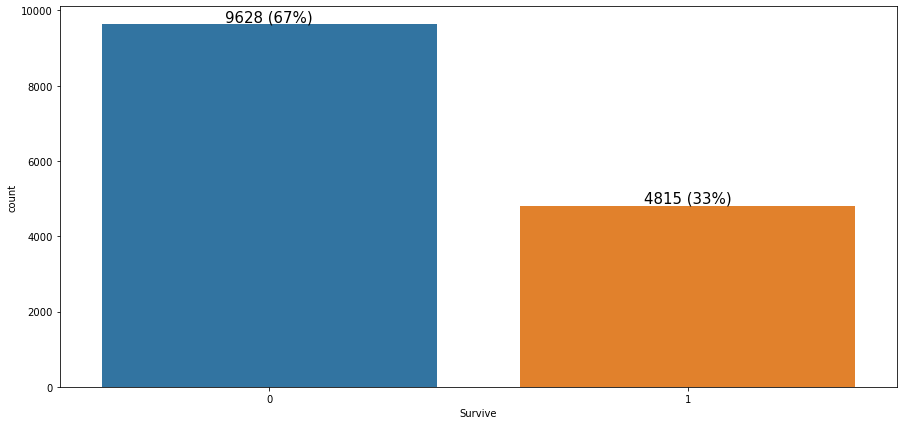

In [34]:
generate_countplot(df, 'Survive')

In [35]:
# # plot count of surviving against non-surviving
# fig, ax = plt.subplots(figsize=(15,7))
# ax = sns.countplot(x=df['Survive'],
#                    order=df['Survive'].value_counts(ascending=False).index)
        
# abs_values = df['Survive'].value_counts(ascending=False)
# rel_values = df['Survive'].value_counts(ascending=False, normalize=True).values * 100
# lbls = [f'{p[0]} ({p[1]:.0f}%)' for p in zip(abs_values, rel_values)]

# ax.bar_label(container=ax.containers[0], labels=lbls, fontsize=15)

As mentioned earlier, there are more patients (67%) that did not survive in the dataset.

### Does the age of a patient affects his/her survival rate?

C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

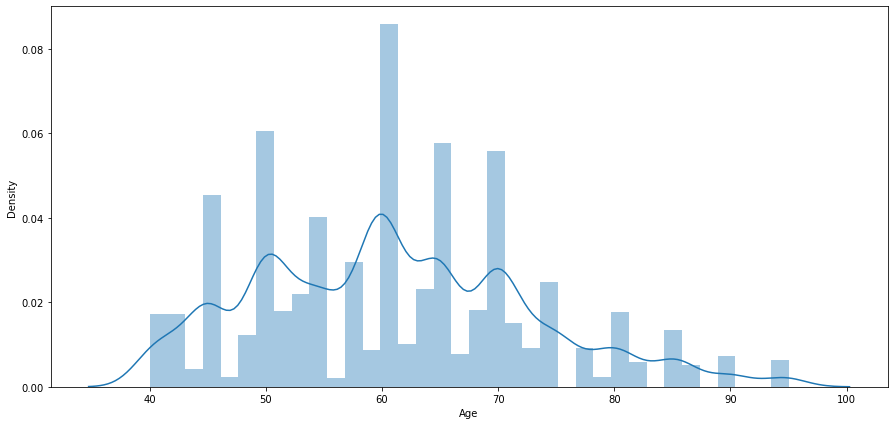

In [36]:
# examine distribution of Age
fig, ax = plt.subplots(figsize=(15,7))
sns.distplot(df['Age'])

It appears that most of these patients are aged around 60. <br>
Is it true that the older the patient is, the higher his/her chances of dying from coronary artery disease? <br>
I will use a boxplot to directly compare the median and spread of `Age` data for both surviving and non-surviving groups:

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Survive', ylabel='Age'>

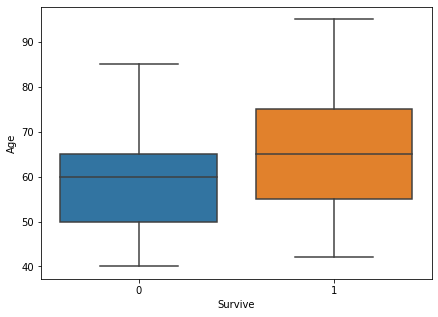

In [37]:
fig, ax = plt.subplots(figsize=(7,5))
sns.boxplot(df['Survive'], df['Age'], showfliers=False)

Surprisingly, it looks like the surviving patients tend to be older than the non-surviving ones. <br>
Let's check their respective mean and median for an exact comparison:

In [38]:
# filter two DataFrames
survived_df = df[df["Survive"] == 1]
not_survive_df = df[df["Survive"] == 0]

# get mean
print(survived_df["Age"].mean())
print(not_survive_df["Age"].mean())

# get median
print(survived_df["Age"].median())
print(not_survive_df["Age"].median())

65.26251298026999
58.898213543830494
65.0
60.0


Both the mean and median of the surviving patients are indeed higher than that of the surviving ones. <br>
From the distribution plot earlier, the ages of the patients do not follow a normal distribution. Hence I will use the Mann-Whitney U Test instead to determine if the age affects the survival rate.

C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

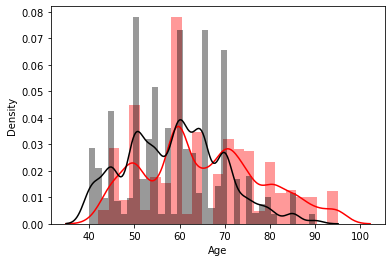

In [39]:
sns.distplot(survived_df["Age"], color='red')
sns.distplot(not_survive_df["Age"], color='black')

In [40]:
mannwhitneyu(survived_df["Age"],
            not_survive_df["Age"])

MannwhitneyuResult(statistic=29370435.5, pvalue=4.720455670746285e-152)

Since the p-value is below 0.05, there is statistical significance in the difference between the 2 groups in terms of age. Hence `Age` is a factor of coronary artery disease.

### How does the gender of the patient affect the survival rate of coronary artery disease?

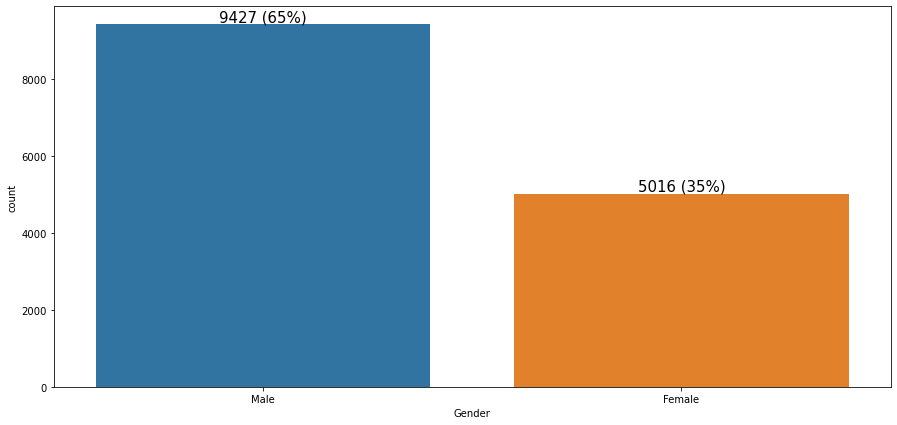

In [41]:
# plot count gender
temp = df.copy()
temp['Gender'].replace({0: "Female", 1: "Male"}, inplace=True)

generate_countplot(temp, 'Gender')

In [42]:
# # plot count gender
# fig, ax = plt.subplots(figsize=(15,7))

# ax = sns.countplot(x=df['Gender'],
#                    order=df['Gender'].value_counts(ascending=False).index)
        
# abs_values = df['Gender'].value_counts(ascending=False)
# rel_values = df['Gender'].value_counts(ascending=False, normalize=True).values * 100
# lbls = [f'{p[0]} ({p[1]:.0f}%)' for p in zip(abs_values, rel_values)]

# ax.bar_label(container=ax.containers[0], labels=lbls, fontsize=15)

There are more `Male` patients (65%) than `Female` patients. This is reasonable as men tend to have a higher incidence of coronary artery disease than women. However, women will also face greater incidences of heart diseases as they age.

What about the proportion of non-surviving patients by Gender?

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Breakdown of Patients by Status and Gender')

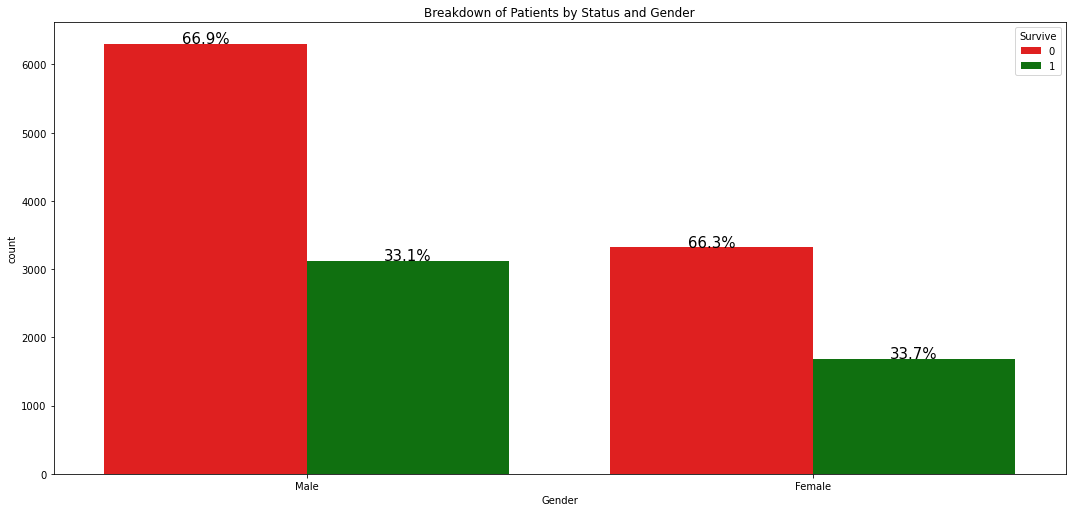

In [43]:
# Breakdown by gender
generate_countplot(temp, 'Gender', 'Survive')
plt.title("Breakdown of Patients by Status and Gender")

In [44]:
# # Breakdown by gender
# fig, ax = plt.subplots(figsize=(15,7))
# colours = ['r','g']
# totals = df['Gender'].value_counts()
# n_hues = df['Survive'].unique().size
# ax = sns.countplot(df['Gender'],
#                    hue=df['Survive'],
#                    order=totals.index,
#                    palette=colours)
# plt.title("Breakdown of Patients by Status and Gender")
# plt.tight_layout()


# temp_totals = totals.values.tolist()*n_hues
# # get count proportion
# for p,t in zip(ax.patches,temp_totals):
#     height = p.get_height()
#     ax.text(p.get_x()+p.get_width()/2.,
#         height + 3,
#         '{0:.1%}'.format(height/t),
#         ha="center", fontsize=15)

Although males are more likely to suffer from coronary artery disease, the proportion of surviving male patients is about the same as than of the female patients (both about half).

What if `Age` is considered along with `Gender`?

<AxesSubplot:xlabel='Age', ylabel='Gender'>

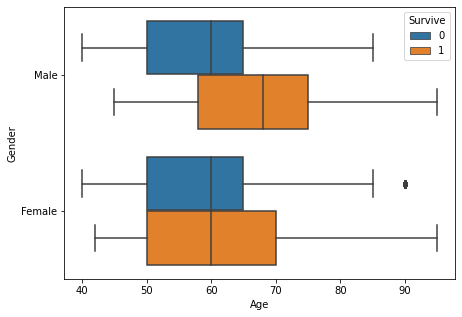

In [45]:
# Age and Gender
fig, ax = plt.subplots(figsize=(7,5))
sns.boxplot(data=temp, x='Age', y='Gender', hue ='Survive')

Surprisingly, it appears that older male patients tend to survive as compared to younger males and females patients. <br>
The age of female patients doesn't seem to affect their survival rate (about the same median). <br>
The difference is more apparent for males. <br>
Hence `Gender` helps in predicting surivial rate.

### Does smoking lead to a lower survival rate?

<AxesSubplot:xlabel='Survive', ylabel='Smoke'>

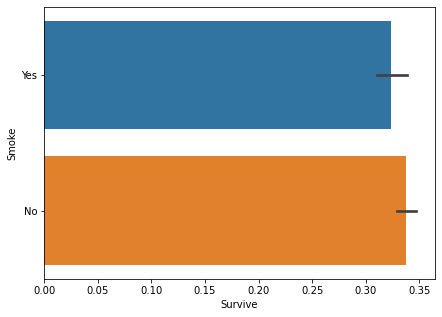

In [46]:
# Smoking
temp = df.copy()
fig, ax = plt.subplots(figsize=(7,5))
temp['Smoke'].replace({0: "No", 1: "Yes"}, inplace=True)
sns.barplot(x='Survive',y="Smoke",data=temp)

From this barplot, it looks like smoking does decreases the survival rate (though only marginally) since the `Yes` bar is closer to `0` in x-axis `Survive`.

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Breakdown between Smokers and Non-smokers')

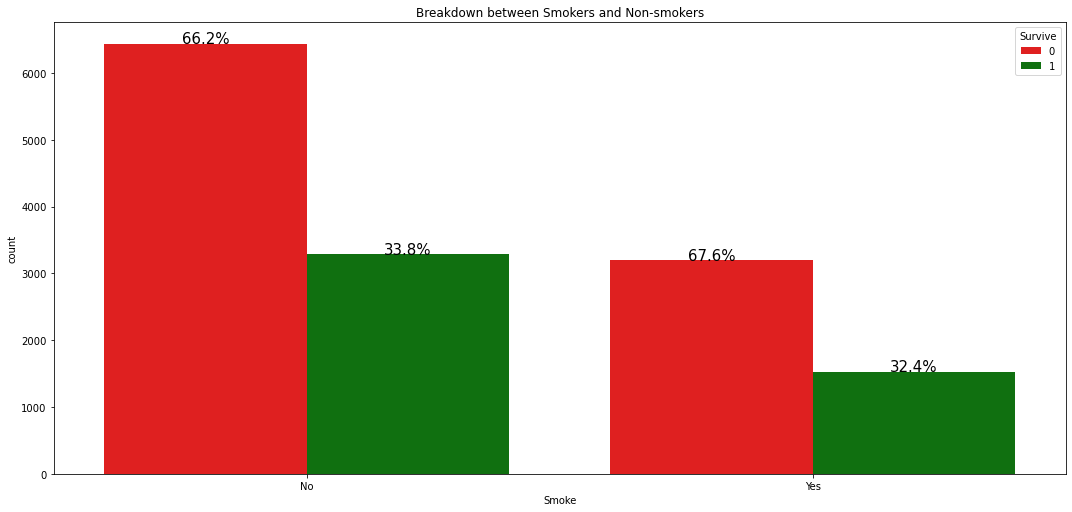

In [47]:
# Breakdown by smoking
generate_countplot(temp, 'Smoke', 'Survive')
plt.title("Breakdown between Smokers and Non-smokers")

In [48]:
# # Breakdown by smoking
# fig, ax = plt.subplots(figsize=(15,7))
# colours = ['r','g']
# totals = df['Smoke'].value_counts()
# n_hues = df['Survive'].unique().size
# ax = sns.countplot(df['Smoke'],
#                    hue=df['Survive'],
#                    order=totals.index,
#                    palette=colours)
# plt.title("Breakdown between Smokers and Non-smokers")
# plt.tight_layout()


# temp_totals = totals.values.tolist()*n_hues
# # get count proportion
# for p,t in zip(ax.patches,temp_totals):
#     height = p.get_height()
#     ax.text(p.get_x()+p.get_width()/2.,
#         height + 3,
#         '{0:.1%}'.format(height/t),
#         ha="center", fontsize=15)

According to the plot, it seems that survival rate between smokers and non-smokers are very similar. This is only about a 1% increase in death rate among the smokers as compared to the non-smokers in the dataset. <br>
Smoking does seem to lead to a lower survival rate.

### Would a diabetic patient suffer from a lower survival rate?

data is successfully saved!


C:\Users\user\anaconda3\lib\site-packages\pandas\core\frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]
C:\Users\user\anaconda3\lib\site-packages\pandas\core\generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


<AxesSubplot:xlabel='Survive', ylabel='Diabetes'>

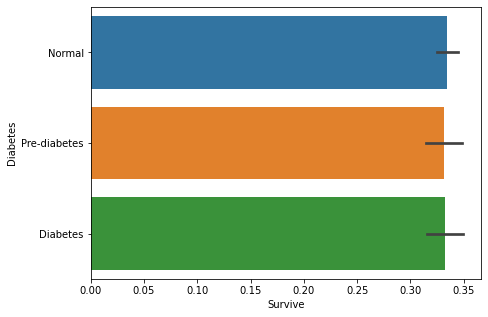

In [49]:
# Diabetes
temp = get_data("data/survive.db")
temp = clean_data(temp, CONFIG_PATH)
temp = encoding_cat_cols(temp, columns)
fig, ax = plt.subplots(figsize=(7,5))
sns.barplot(x='Survive',y="Diabetes",data=temp)

In [50]:
# # Diabetes
# fig, ax = plt.subplots(figsize=(7,5))
# sns.barplot(x='Survive',y="Diabetes",data=df)

The proportion of surviving patient appears to be the same across all 3 conditions.

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Breakdown by Diabetic and Non-diabetic Patients')

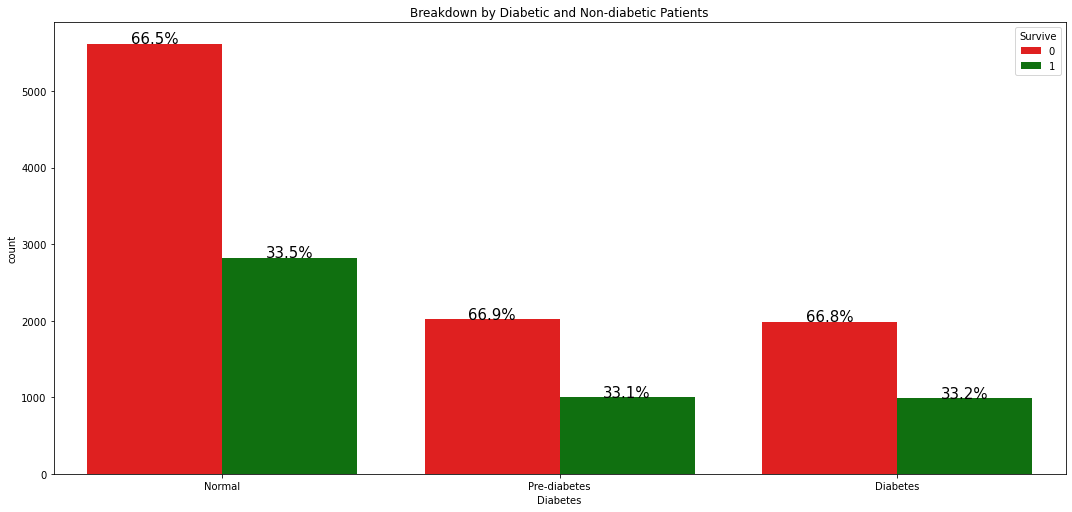

In [51]:
# Breakdown by diabetes
generate_countplot(temp, 'Diabetes', 'Survive')
plt.title("Breakdown by Diabetic and Non-diabetic Patients")

In [52]:
# # Breakdown by diabetes
# fig, ax = plt.subplots(figsize=(15,7))
# colours = ['r','g']
# totals = df['Diabetes'].value_counts()
# n_hues = df['Survive'].unique().size
# ax = sns.countplot(df['Diabetes'],
#                    hue=df['Survive'],
#                    order=totals.index,
#                    palette=colours)
# plt.title("Breakdown by Diabetic and Non-diabetic Patients")
# plt.tight_layout()


# temp_totals = totals.values.tolist()*n_hues
# # get count proportion
# for p,t in zip(ax.patches,temp_totals):
#     height = p.get_height()
#     ax.text(p.get_x()+p.get_width()/2.,
#         height + 3,
#         '{0:.1%}'.format(height/t),
#         ha="center", fontsize=15)

Another odd observation from the dataset is that diabetic patients face the same risk of death (about 66%) as their non-diabetic counterparts. <br>
Hence a diabetic patient may not necessarily suffer from a lower survival rate.

### Does the strength of the heart (Ejection Fraction) affect the survival rate?

In [53]:
# # Ejection Fraction
# fig, ax = plt.subplots(figsize=(7,5))
# sns.barplot(x='Survive',y="Ejection_Fraction",data=df)

Every patients with `High` `Ejection_Fraction` suspiciously do not survive in the dataset. Let's have a look at these patients: 

In [54]:
# df[df['Ejection_Fraction'] =='High']

Upon closer examination, it seems that only 1 patient that didn't survive has a `high` `Ejection_Fraction`. All the other records seem to show the same characteristics, but only with a different `Height`, `Weight`, etc. <br>
Thus, it would be better to remove this entry entirely as these rows are suspected to be synthetic.

In [55]:
# # remove all entries with high Ejection_Fraction
# df2 = df.copy()
# df2 = df2[df2['Ejection_Fraction'] !='High']

# survived_df2 = df2[df2["Survive"] == 1]
# not_survive_df2 = df2[df2["Survive"] == 0]

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Breakdown of Patients by Status and Ejection Fraction')

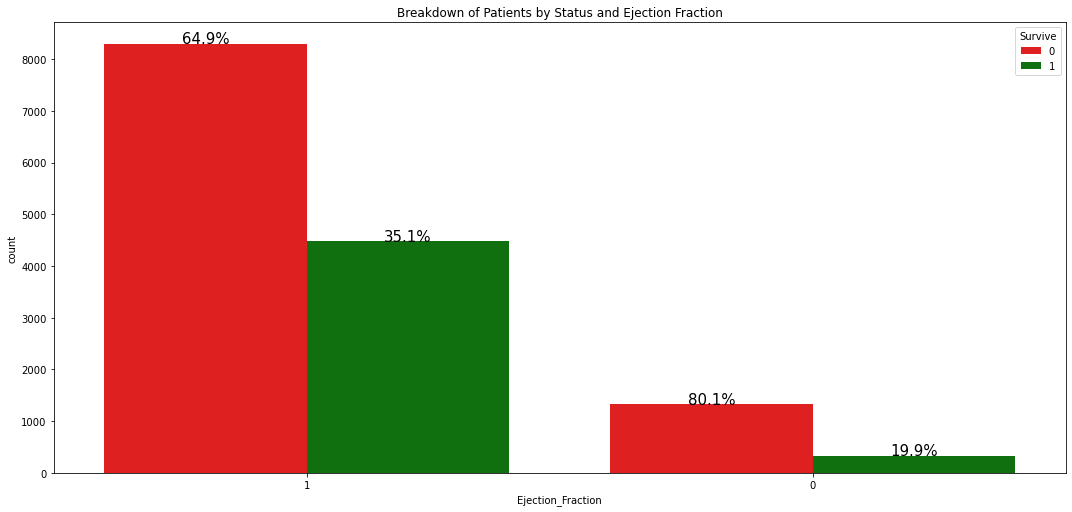

In [56]:
# Breakdown by Ejection_Fraction
generate_countplot(temp, 'Ejection_Fraction', 'Survive')
plt.title("Breakdown of Patients by Status and Ejection Fraction")

In [57]:
# # Breakdown by Ejection_Fraction
# fig, ax = plt.subplots(figsize=(15,7))
# colours = ['r','g']
# totals = df2['Ejection_Fraction'].value_counts()
# n_hues = df2['Survive'].unique().size
# ax = sns.countplot(df2['Ejection_Fraction'],
#                    hue=df2['Survive'],
#                    order=totals.index,
#                    palette=colours)
# plt.title("Breakdown of Patients by Status and Ejection Fraction")
# plt.tight_layout()


# temp_totals = totals.values.tolist()*n_hues
# # get count proportion
# for p,t in zip(ax.patches,temp_totals):
#     height = p.get_height()
#     ax.text(p.get_x()+p.get_width()/2.,
#         height + 3,
#         '{0:.1%}'.format(height/t),
#         ha="center", fontsize=15)

It's strange that patients with a `Normal` `Ejection Fraction` are much less likely to survive than those who have `Low` `Ejection Fraction`. <br>
A higher Ejection Fraction may lead a lower survival rate.

### Are obese patients likely to suffer from a lower survival rate?


C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Breakdown of Patients by Status and Obesity Status')

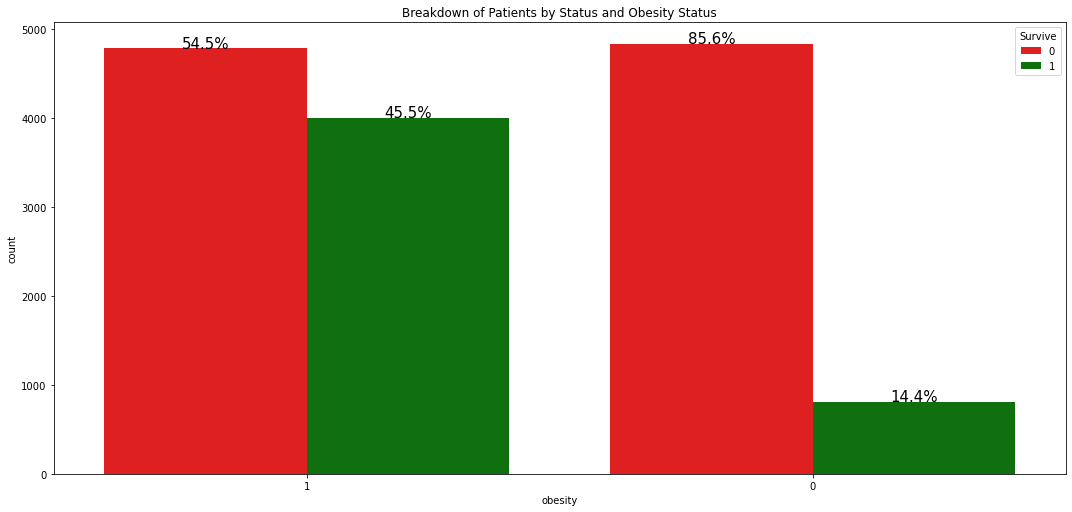

In [58]:
# Breakdown by obesity
generate_countplot(df, 'obesity', 'Survive')
plt.title("Breakdown of Patients by Status and Obesity Status")

In [59]:
# # obese:
# fig, ax = plt.subplots(figsize=(15,7))
# colours = ['r','g']
# totals = df2['obesity'].value_counts()
# n_hues = df2['Survive'].unique().size
# ax = sns.countplot(df2['obesity'],
#                    hue=df2['Survive'],
#                    order=totals.index,
#                    palette=colours)
# plt.title("Breakdown of Patients by Status and Obesity Status")
# plt.tight_layout()


# temp_totals = totals.values.tolist()*n_hues
# # get count proportion
# for p,t in zip(ax.patches,temp_totals):
#     height = p.get_height()
#     ax.text(p.get_x()+p.get_width()/2.,
#         height + 3,
#         '{0:.1%}'.format(height/t),
#         ha="center", fontsize=15)

The dataset seems to suggest that non-obese patients are less likely to survive.

### Do non-surviving patients tend to have:
### lower sodium level?

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Survive', ylabel='Sodium'>

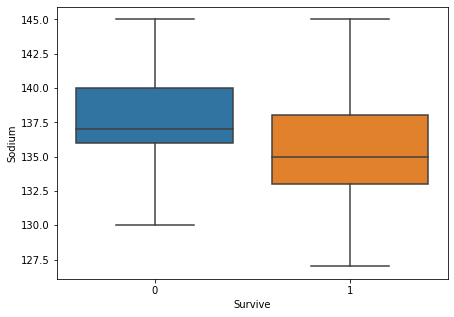

In [60]:
fig, ax = plt.subplots(figsize=(7,5))
sns.boxplot(df['Survive'], df['Sodium'], showfliers=False)

It appears that surviving patients tend to have lower sodium levels instead.

In [61]:
mannwhitneyu(survived_df["Sodium"],
            not_survive_df["Sodium"])

MannwhitneyuResult(statistic=16638925.0, pvalue=3.7300468721746435e-170)

Since the p-value is below 0.05, there is statistical significance in the difference between the 2 groups in terms of sodium level. Hence `Sodium` is a factor of coronary artery disease.

#### higher creatinine level?

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Survive', ylabel='Creatinine'>

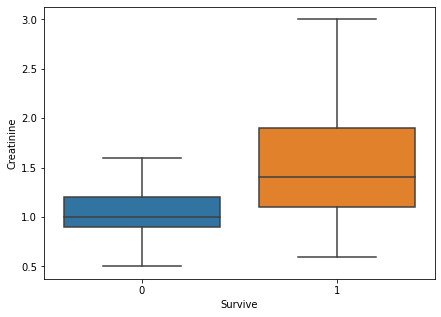

In [62]:
fig, ax = plt.subplots(figsize=(7,5))
sns.boxplot(df['Survive'], df['Creatinine'], showfliers=False)

Surviving patients tend to have higher creatinine level instead.

In [63]:
mannwhitneyu(survived_df["Creatinine"],
            not_survive_df["Creatinine"])

MannwhitneyuResult(statistic=34110994.0, pvalue=0.0)

Since the p-value is below 0.05, there is statistical significance in the difference between the 2 groups in terms of Creatinine level. Hence `Creatinine` is a factor of coronary artery disease.

#### higher platelets level?


C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Survive', ylabel='Platelets'>

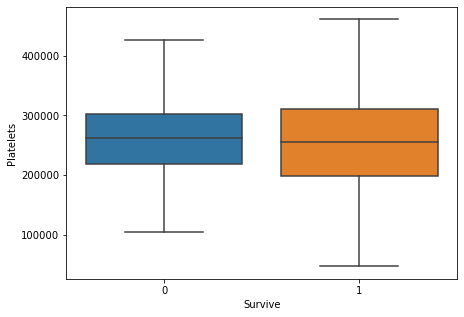

In [64]:
fig, ax = plt.subplots(figsize=(7,5))
sns.boxplot(df['Survive'], df['Platelets'], showfliers=False)

Platelets counts are about the same between the groups.

In [65]:
mannwhitneyu(survived_df["Creatinine"],
            not_survive_df["Creatinine"])

MannwhitneyuResult(statistic=34110994.0, pvalue=0.0)

#### higher enzyme level (Creatine phosphokinase)?

In [66]:
# this feature was removed in clean_data 
# as there is not much statistical difference in Creatine phosphokinase between surviving and non-surviving patients.

In [67]:
# fig, ax = plt.subplots(figsize=(7,5))
# sns.boxplot(df2['Survive'], df2['Creatine_phosphokinase'], showfliers=False)

Creatine phosphokinase levels about the same between the groups.

In [68]:
# mannwhitneyu(survived_df2["Creatine_phosphokinase"],
#             not_survive_df2["Creatine_phosphokinase"])

Since the p-value in more than 0.05, there is not much statistical difference in Creatine phosphokinase between surviving and non-surviving patients. Hence this factor can be removed. 

In [69]:
# # remove columns from df
# df2.drop(['Creatine_phosphokinase'], axis=1, inplace=True)

#### higher blood pressure?


C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Survive', ylabel='Blood_Pressure'>

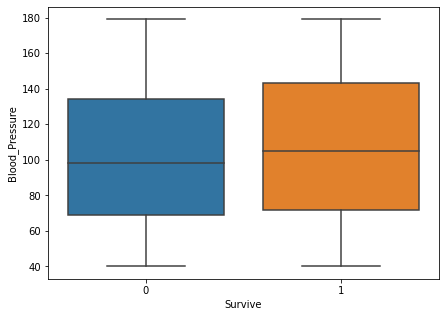

In [70]:
fig, ax = plt.subplots(figsize=(7,5))
sns.boxplot(df['Survive'], df['Blood_Pressure'], showfliers=False)

Surviving patients tend to have a slightly higher Blood Pressure.

In [71]:
mannwhitneyu(survived_df["Blood_Pressure"],
            not_survive_df["Blood_Pressure"])

MannwhitneyuResult(statistic=24788573.5, pvalue=9.605705607142159e-12)

#### adnormal hemoglobin level?

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Survive', ylabel='Hemoglobin'>

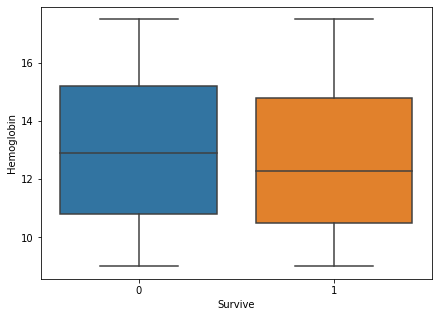

In [72]:
fig, ax = plt.subplots(figsize=(7,5))
sns.boxplot(df['Survive'], df['Hemoglobin'], showfliers=False)

Surviving patients tend to have a slightly lower level of hemoglobin.

In [73]:
mannwhitneyu(survived_df["Hemoglobin"],
            not_survive_df["Hemoglobin"])

MannwhitneyuResult(statistic=21533625.0, pvalue=3.222413856555337e-12)

Due to a lack of domain knowledge, coupled with the fact that most of my initial assumptions made in the Data Cleaning, Fix Structural Errors section do not correspond to the findings, I will not use the grouped catergorical version of `Sodium`, `Creatinine` ,`Platelets`,`Creatine phosphokinase`, `Blood Pressure` and `Hemoglobin`. Instead I will use them as numerical variables.

In [74]:
# remove bin columns
df.drop(['Sodium_bin', 'Creatinine_bin', 'Platelets_bin', 'Blood_Pressure_bin', 'Hemoglobin_bin'], axis = 1, inplace=True)

### Correlation
To get an accurate sense of the correlations of the variables with `Survive`, some data processing steps have to be made.
#### One-Hot Encoding Catergoical Variables
For catergoical variables, there is a need to convert them into numerical values so that they can be read by Machine Learning models.

In [75]:
# encoding was already done in encoding_cat_cols(df, columns, dummy_columns)
df

,Survive,Gender,Smoke,Age,Ejection_Fraction,Sodium,Creatinine,Platelets,Blood_Pressure,Hemoglobin,Diabetes_Diabetes,Diabetes_Normal,Diabetes_Pre-diabetes,obesity
0,0,1,1,50,1,141,0.7,266000.0,105,12.3,0,1,0,1
1,1,1,0,75,1,134,2.5,224000.0,162,13.0,0,1,0,0
2,1,0,0,80,1,135,1.3,192000.0,179,12.4,0,0,1,1
3,0,1,0,60,1,136,0.9,228000.0,136,15.3,0,1,0,1
4,0,0,0,70,1,141,0.9,358000.0,171,13.3,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,0,1,1,50,1,140,0.9,362000.0,109,11.8,0,1,0,0
14996,1,1,1,62,1,140,0.9,253000.0,141,14.6,0,1,0,1
14997,0,0,0,61,1,141,0.9,229000.0,173,9.2,0,1,0,1
14998,0,1,0,77,1,137,1.1,406000.0,154,11.3,0,1,0,0


In [76]:
# # create lists for easy reading
# # note: obesity has already been manually encoded
# bin_list = ['Gender',
#             'Smoke',
#             'Ejection_Fraction']

In [77]:
# # manual hot-one encoding into dummy variables
# df2 = pd.get_dummies(df2, columns=['Diabetes'])

In [78]:
# # convert Gender column
# df2['Gender'] = df2[bin_list].replace({'Female': 1, 'Male': 0})

# # convert Ejection_Fraction column
# df2['Ejection_Fraction'] = df2[bin_list].replace({'Low': 1, 'Normal': 0})

# # convert all yes/no columns
# df2[bin_list] = df2[bin_list].replace({'Yes': 1, 'No': 0})

# df2

### Normalising Numerical Variables
Normalization creating new values such that they maintain the general distribution and ratios in the dataset, while keeping values within a scale applied across all numeric columns. This prevents any variables with high values from becoming the dominating factor, which may be misleading.

In [79]:
# columns to normalise
cols_nor = ['Age', 'Sodium', 'Creatinine', 'Platelets', 'Blood_Pressure', 'Hemoglobin']

In [80]:
df[cols_nor] = (df[cols_nor]-df[cols_nor].mean())/df[cols_nor].std()

df

,Survive,Gender,Smoke,Age,Ejection_Fraction,Sodium,Creatinine,Platelets,Blood_Pressure,Hemoglobin,Diabetes_Diabetes,Diabetes_Normal,Diabetes_Pre-diabetes,obesity
0,0,1,1,-0.928035,1,1.007797,-0.679504,0.030265,0.028956,-0.240028,0,1,0,1
1,1,1,0,1.177319,1,-0.587938,1.040470,-0.397387,1.463242,0.039866,0,1,0,0
2,1,0,0,1.598390,1,-0.359976,-0.106179,-0.723218,1.891012,-0.200044,0,0,1,1
3,0,1,0,-0.085893,1,-0.132014,-0.488396,-0.356658,0.809006,0.959518,0,1,0,1
4,0,0,0,0.756248,1,1.007797,-0.488396,0.967028,1.689708,0.159821,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,0,1,1,-0.928035,1,0.779835,-0.488396,1.007757,0.129607,-0.439953,0,1,0,0
14996,1,1,1,0.082535,1,0.779835,-0.488396,-0.102103,0.934821,0.679624,0,1,0,1
14997,0,0,0,-0.001679,1,1.007797,-0.488396,-0.346476,1.740034,-1.479560,0,1,0,1
14998,0,1,0,1.345747,1,0.095948,-0.297287,1.455774,1.261939,-0.639877,0,1,0,0


<AxesSubplot:>

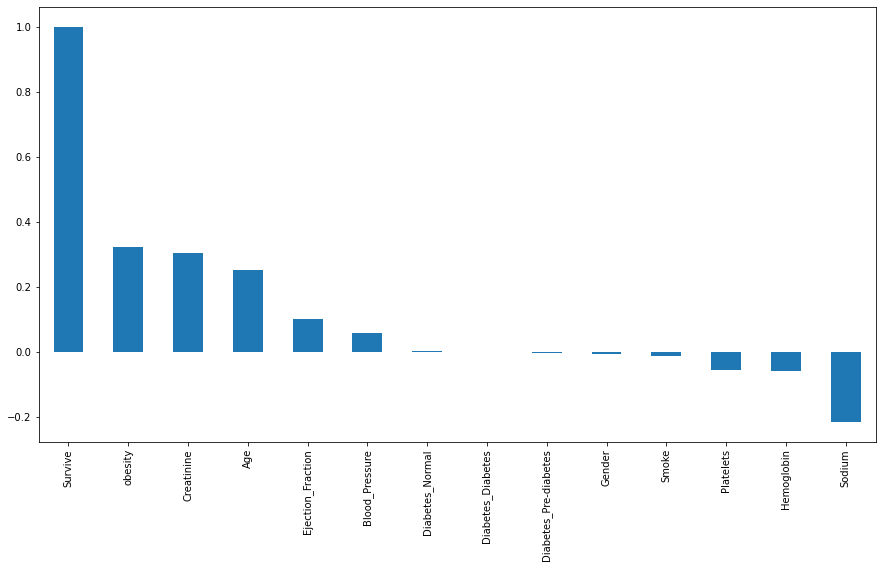

In [81]:
# get correlation of "Survive" with other variables:
plt.figure(figsize=(15,8))

df.corr()['Survive'].sort_values(ascending = False).plot(kind='bar')

It appears that `obesity` and `Creatinine` and `Age` are positively correlated with `Survive`. This correspond with the earlier finding that an older, obese patient with a high leve of Creatinine is more likely to survive.

On the other hand, it looks like patients with low Sodium levels are negatively correlated with `Survive`, meaning they are more likely to not survive. This contradicts the observation made earlier. Since the correlation value is only at 0.2, it is not a signicant factor to determine the survival rate.

# References
- Aujla RS, Patel R. Creatine Phosphokinase. [Updated 2021 Apr 20]. In: StatPearls [Internet]. Treasure Island (FL): StatPearls Publishing; 2022 Jan-. Available from: https://www.ncbi.nlm.nih.gov/books/NBK546624/

- Bagheri, B., Radmard, N., Makrani, A., &amp; Rasouli, M. (2019). Serum creatinine and occurrence and severity of coronary artery disease. Medical Archives, 73(3), 154. https://doi.org/10.5455/medarh.2019.73.154-156 

- Chonchol, M., &amp; Nielson, C. (2008). Hemoglobin levels and coronary artery disease. American Heart Journal, 155(3), 494–498. https://doi.org/10.1016/j.ahj.2007.10.031 

- Uysal, H. B., Dağlı, B., Akgüllü, C., Avcil, M., Zencir, C., Ayhan, M., &amp; Sönmez, H. M. (2016). Blood count parameters can predict the severity of coronary artery disease. The Korean Journal of Internal Medicine, 31(6), 1093–1100. https://doi.org/10.3904/kjim.2015.199 

- Verdecchia, P., Angeli, F., Cavallini, C., Mazzotta, G., Garofoli, M., Martire, P., &amp; Reboldi, G. (2010). The optimal blood pressure target for patients with coronary artery disease. Current Cardiology Reports, 12(4), 302–306. https://doi.org/10.1007/s11886-010-0112-y 

- Wannamethee, S. G., Shaper, A. G., Lennon, L., Papacosta, O., &amp; Whincup, P. (2016). Mild hyponatremia, hypernatremia and incident cardiovascular disease and mortality in older men: A population-based Cohort Study. Nutrition, Metabolism and Cardiovascular Diseases, 26(1), 12–19. [https://doi.org/10.1016/j.numecd.2015.07.008 ]
